In [86]:
# import libraries
from pycaret.regression import *
# from pycaret.arules import *
# from pycaret.clustering import *
# from pycaret.classification import *
import random
import pandas as pd# read in your stock data
import finviz

# Plot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [87]:
lucky_for_life = pd.read_csv('C:\\Users\Frank Einstein\\Desktop\\lottery\\NCELLuckyForLife.csv')
# powerball = pd.read_csv('C:\\Users\Frank Einstein\\Desktop\\lottery\\NCELPowerball.csv')
# mega_millions = pd.read_csv('C:\\Users\Frank Einstein\\Desktop\\lottery\\NCEL_Mega-Millions.csv')
# pick_4 = pd.read_csv('C:\\Users\Frank Einstein\\Desktop\\lottery\\NCELPick4.csv')
# pick_3 = pd.read_csv('C:\\Users\Frank Einstein\\Desktop\\lottery\\NCELPick3.csv') 

<>:1: DeprecationWarning: invalid escape sequence \F


In [88]:
df = lucky_for_life

In [89]:
years = df['Date'].to_list()

# days = [x.split("/")[1] for x in years]
# months = [x.split("/")[0] for x in years]

years = [x.split("/")[2] for x in years]

df['Date'] = years
df = df[df['Date'] > '2020']

# df = df[df['Number 1'] == 1]

In [42]:
# df = df.drop(columns=['Jackpot', 'Power Play'])
# df = df.drop(columns=['Megaplier', 'Jackpot'])
# df = df.drop(columns=['Day/Eve'])
# df = df.drop(columns=['Day/Eve', 'GreenBall', 'DoubleDraw*'])

<Figure size 800x640 with 0 Axes>

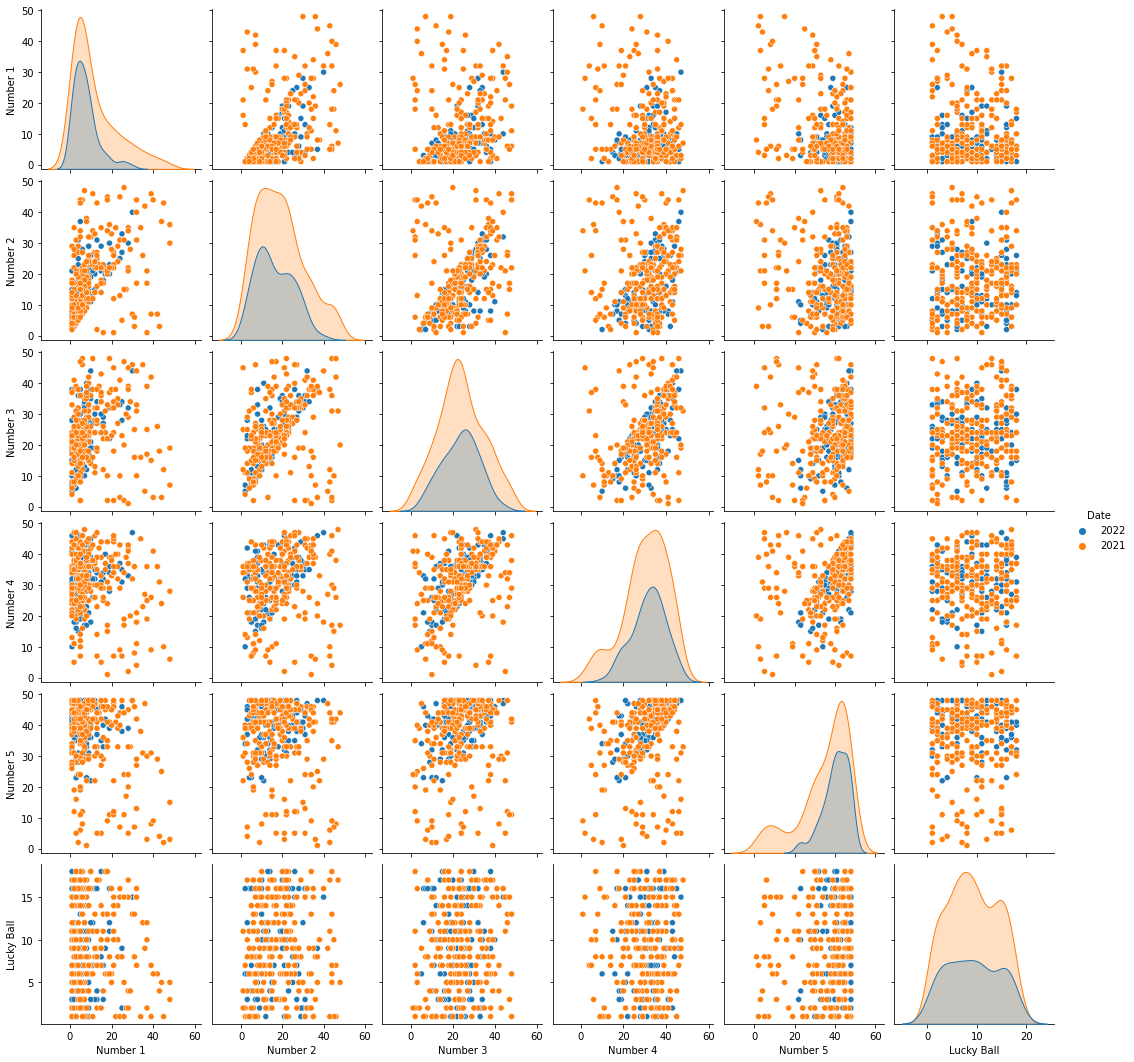

In [90]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df,hue="Date", kind = 'scatter')
plt.show()

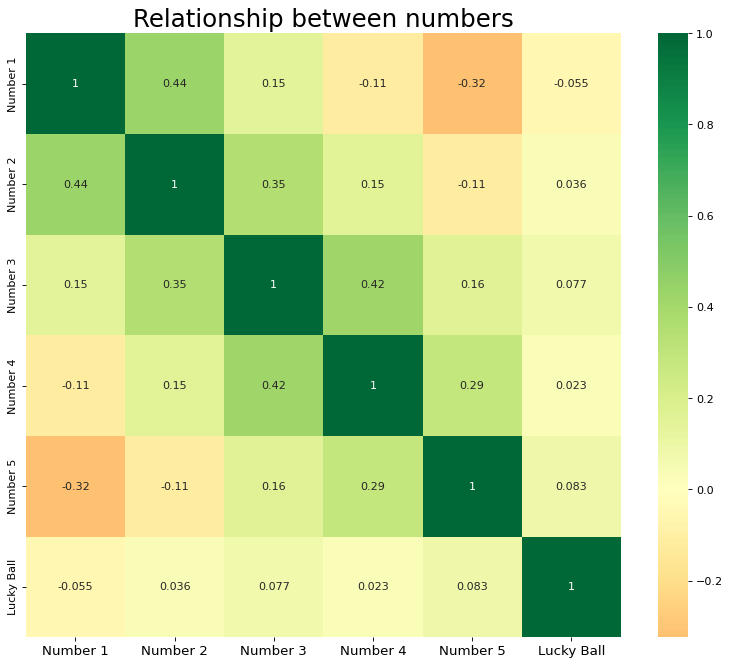

In [44]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Relationship between numbers', fontsize=22)
plt.xticks(fontsize=12)
plt.show()

In [332]:
from collections import Counter

one = df['Number 1'].to_list()
two = df['Number 2'].to_list()
three = df['Number 3'].to_list()
four = df['Number 4'].to_list()

five = df['Number 5'].to_list()

lucky = df['Lucky Ball'].to_list()
# lucky = df['Powerball'].to_list()


print('Number One')
print("\n")

top_5_one = list(dict(Counter(one).most_common()))[:3]
print(top_5_one)

print("\n")
print('Number Two')
print("\n")
top_5_two = list(dict(Counter(two).most_common()))[:3]
print(top_5_two)

print("\n")
print('Number Three')
print("\n")
top_5_three = list(dict(Counter(three).most_common()))[:3]
print(top_5_three)

print("\n")
print('Number Four')
print("\n")
top_5_four = list(dict(Counter(four).most_common()))[:3]
print(top_5_four)

print("\n")
print('Number Five')
print("\n")
top_5_five = list(dict(Counter(four).most_common()))[:3]
print(top_5_five)

print("\n")
print('Lucky Ball')
print("\n")
lucky_ball = list(dict(Counter(lucky).most_common()))[:3]
print(lucky_ball)

Number One


[1, 5, 3]


Number Two


[10, 23, 21]


Number Three


[24, 22, 28]


Number Four


[36, 29, 28]


Number Five


[36, 29, 28]


Lucky Ball


[6, 16, 9]


In [333]:
top_5_two = np.array(top_5_two) 

top_5_two = top_5_two[top_5_two > all(top_5_one)]     

top_5_two = top_5_two[top_5_two <= (np.median(top_5_two) + np.std(top_5_two))]
top_5_two = top_5_two[top_5_two >= (np.median(top_5_two) - np.std(top_5_two))]

In [334]:
top_5_three = np.array(top_5_three) 

top_5_three = top_5_three[top_5_three > all(top_5_two)] 
top_5_three = top_5_three[top_5_three > all(top_5_one)] 

top_5_three = top_5_three[top_5_three <= (np.median(top_5_three) + np.std(top_5_three))]
top_5_three = top_5_three[top_5_three >= (np.median(top_5_three) - np.std(top_5_three))]

In [335]:
top_5_four = np.array(top_5_four) 

top_5_four = top_5_four[top_5_four > all(top_5_three)]    
top_5_four = top_5_four[top_5_four > all(top_5_two)]   
top_5_four = top_5_four[top_5_four > all(top_5_one)]   

top_5_four = top_5_four[top_5_four <= (np.median(top_5_four) + np.std(top_5_four))]
top_5_four = top_5_four[top_5_four >= (np.median(top_5_four) - np.std(top_5_four))]

In [336]:
top_5_five = np.array(top_5_five) 

top_5_five = top_5_five[top_5_five > all(top_5_four)]
top_5_five = top_5_five[top_5_five > all(top_5_three)]
top_5_five = top_5_five[top_5_five > all(top_5_two)]
top_5_five = top_5_five[top_5_five > all(top_5_one)]

top_5_five = top_5_five[top_5_five <= (np.median(top_5_five) + np.std(top_5_five))]
top_5_five = top_5_five[top_5_five >= (np.median(top_5_five) - np.std(top_5_five))]

In [337]:
lucky_ball = np.array(lucky_ball) 

lucky_ball = lucky_ball[lucky_ball <= (np.median(lucky_ball) + np.std(lucky_ball))]
lucky_ball = lucky_ball[lucky_ball >= (np.median(lucky_ball) - np.std(lucky_ball))]

In [338]:
import itertools
a = [top_5_one, top_5_two, top_5_three, top_5_four, top_5_five, lucky_ball]
generated = list(itertools.product(*a))
generated.sort()

generated = list(generated for generated,_ in itertools.groupby(generated))

In [339]:
print(a)

[[1, 5, 3], array([23, 21]), array([24, 22]), array([29, 28]), array([29, 28]), array([6, 9])]


In [344]:
for tuple_pair in generated:
    f = open("C:\\Users\\Frank Einstein\\Desktop\\lottery\\all_combos_top_2_LFL.txt", "w+")
    if len(set(tuple_pair)) == len(tuple_pair):
        f.write(str(tuple_pair) + "\n")
        f.close()
        print(tuple_pair)

(1, 21, 22, 28, 29, 6)
(1, 21, 22, 28, 29, 9)
(1, 21, 22, 29, 28, 6)
(1, 21, 22, 29, 28, 9)
(1, 21, 24, 28, 29, 6)
(1, 21, 24, 28, 29, 9)
(1, 21, 24, 29, 28, 6)
(1, 21, 24, 29, 28, 9)
(1, 23, 22, 28, 29, 6)
(1, 23, 22, 28, 29, 9)
(1, 23, 22, 29, 28, 6)
(1, 23, 22, 29, 28, 9)
(1, 23, 24, 28, 29, 6)
(1, 23, 24, 28, 29, 9)
(1, 23, 24, 29, 28, 6)
(1, 23, 24, 29, 28, 9)
(3, 21, 22, 28, 29, 6)
(3, 21, 22, 28, 29, 9)
(3, 21, 22, 29, 28, 6)
(3, 21, 22, 29, 28, 9)
(3, 21, 24, 28, 29, 6)
(3, 21, 24, 28, 29, 9)
(3, 21, 24, 29, 28, 6)
(3, 21, 24, 29, 28, 9)
(3, 23, 22, 28, 29, 6)
(3, 23, 22, 28, 29, 9)
(3, 23, 22, 29, 28, 6)
(3, 23, 22, 29, 28, 9)
(3, 23, 24, 28, 29, 6)
(3, 23, 24, 28, 29, 9)
(3, 23, 24, 29, 28, 6)
(3, 23, 24, 29, 28, 9)
(5, 21, 22, 28, 29, 6)
(5, 21, 22, 28, 29, 9)
(5, 21, 22, 29, 28, 6)
(5, 21, 22, 29, 28, 9)
(5, 21, 24, 28, 29, 6)
(5, 21, 24, 28, 29, 9)
(5, 21, 24, 29, 28, 6)
(5, 21, 24, 29, 28, 9)
(5, 23, 22, 28, 29, 6)
(5, 23, 22, 28, 29, 9)
(5, 23, 22, 29, 28, 6)
(5, 23, 22,

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\Frank Einstein\\Desktop\\lottery\\all_combos_top_2_LFL.txt' mode='w+' encoding='cp1252'>
  


In [18]:
setup(data = df, 
target = 'Lucky Ball',        
feature_selection=True,
feature_selection_threshold = 0.1,
use_gpu = True,
   silent = True
  )# compare models

,Description,Value
0,session_id,4369
1,Target,Lucky Ball
2,Original Data,"(328, 7)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(229, 2)"


('reg-default-name',
 4369,
 1,
 False,
 [],
 {'mae': <pycaret.containers.metrics.regression.MAEMetricContainer at 0x1a31ab31908>,
  'mse': <pycaret.containers.metrics.regression.MSEMetricContainer at 0x1a317488e88>,
  'rmse': <pycaret.containers.metrics.regression.RMSEMetricContainer at 0x1a317488e48>,
  'r2': <pycaret.containers.metrics.regression.R2MetricContainer at 0x1a317488588>,
  'rmsle': <pycaret.containers.metrics.regression.RMSLEMetricContainer at 0x1a317488348>,
  'mape': <pycaret.containers.metrics.regression.MAPEMetricContainer at 0x1a317488048>},
 Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Lucky 

In [19]:
model = create_model(compare_models())

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.2149,33.3542,5.7753,-0.0025,0.9304,1.1295
1,4.2100,25.3975,5.0396,-0.0112,0.8455,0.7866
2,5.6249,37.4077,6.1162,-0.0554,0.9844,1.4000
3,4.5772,27.6961,5.2627,-0.0001,0.8517,0.7209
4,5.3155,34.3573,5.8615,-0.2588,1.0239,2.4070
5,3.7442,21.7871,4.6677,-0.0108,0.8309,0.6454
6,3.8210,19.3584,4.3998,-0.0044,0.6421,0.5183
7,5.2062,33.7287,5.8076,-0.0816,0.7405,0.7385
8,4.8567,29.8256,5.4613,-0.0096,0.8374,1.4238
9,4.3874,25.5834,5.0580,-0.5501,0.6159,0.3151


In [ ]:
tuned_model  = tune_model(model)

In [ ]:
predict_model(model).to_csv('E:\\predictions.csv')

In [ ]:
save_model(tuned_model, 'nc_lottery')

In [ ]:
plot_model(tuned_model, plot='feature')